# **Генерация индивидуальных вариантов**

Скопировать файл "Кредит.csv" в папку \content.

Выполнить следующие фрагменты кода.

In [7]:
# установка библиотеки для генерации
%pip install sdv

In [8]:
from sdv.datasets.local import load_csvs
data=load_csvs(folder_name = '/content/')
from sdv.metadata import Metadata
metadata = Metadata.detect_from_dataframes(data)
from sdv.multi_table import HMASynthesizer
synthesizer = HMASynthesizer(metadata)
synthesizer.fit(data)

/usr/local/lib/python3.11/dist-packages/sdv/multi_table/base.py:101: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Индивидуальный вариант соответствует номеру студента по списку в журнале посещаемости занятий.

Значение параметра `scale` установить в соответствие с индивидуальным вариантом.Величина параметра `scale` начинается со значения 1 для варианта 1 и увеличивается с шагом 0,1 для следующих вариантов:
- вариант 1: `scale = 1`;
- вариант 2: `scale = 1.1`;
- вариант 3: `scale = 1.2`;
- и т. д.

In [9]:
synthetic_data = synthesizer.sample(scale = 1.9)

In [10]:
import pandas as pd
df = synthetic_data['Кредит']
df.head()

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита
0,sdv-id-YoJCTc,Male,No,0,Graduate,No,2764,7.525000e-10,107.0,360.0,1.0,Urban,Y
1,sdv-id-baJBwl,Male,No,0,Graduate,No,4884,1.185492e-02,128.0,360.0,0.0,Urban,Y
2,sdv-id-luQIva,Female,Yes,2,Graduate,Yes,4541,1.110000e-10,121.0,360.0,0.0,Urban,N
3,sdv-id-cjxjzN,Female,Yes,0,Graduate,No,3448,1.233867e+02,132.0,360.0,1.0,Semiurban,Y
4,sdv-id-Kkibjn,Male,Yes,0,Graduate,No,2424,1.129929e+01,123.0,360.0,0.0,Semiurban,Y


#**Многомерный анализ признаков**

Построить диаграмму рассеяния для любых количественных признаков.

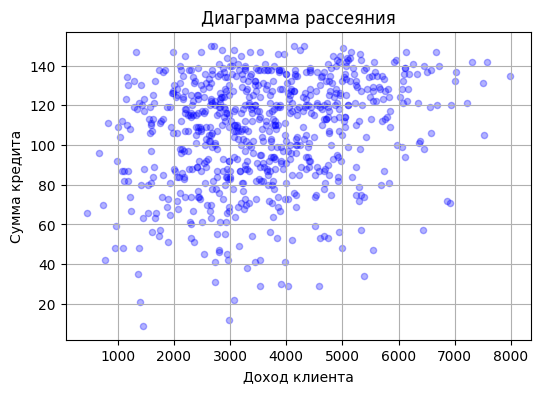

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.scatter (df['Доход клиента'],
             df['Сумма кредита'],
             c = 'b',
             alpha = 0.3,
             s = 20)
plt.title('Диаграмма рассеяния')
plt.ylabel('Сумма кредита')
plt.xlabel('Доход клиента')
plt.grid()


Построить диаграмму рассеяния для любого количественного признака, разделенного по категориям любого категориального признака. Объекты на диаграмме должны иметь разные цвета. Отобразить легенду.

<ipython-input-12-97273ff0164d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df['Одобрение кредита'].replace({'Y':0, 'N':1})


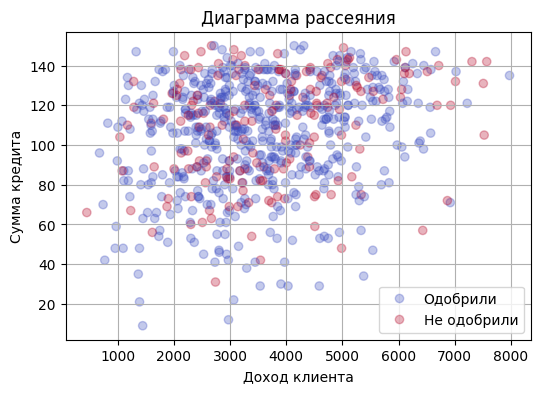

In [12]:
col = df['Одобрение кредита'].replace({'Y':0, 'N':1})
l = ['Одобрили', 'Не одобрили']

plt.figure(figsize = (6, 4))
scat = plt.scatter(df['Доход клиента'],
                   df['Сумма кредита'],
                   c = col,
                   alpha = 0.3,
                   cmap = 'coolwarm',
                   label = l)
plt.title('Диаграмма рассеяния')
plt.ylabel('Сумма кредита')
plt.xlabel('Доход клиента')
plt.legend(handles = scat.legend_elements()[0],
           labels = l)
plt.grid();


Построить диаграммы рассеяния для всех количественных признаков.

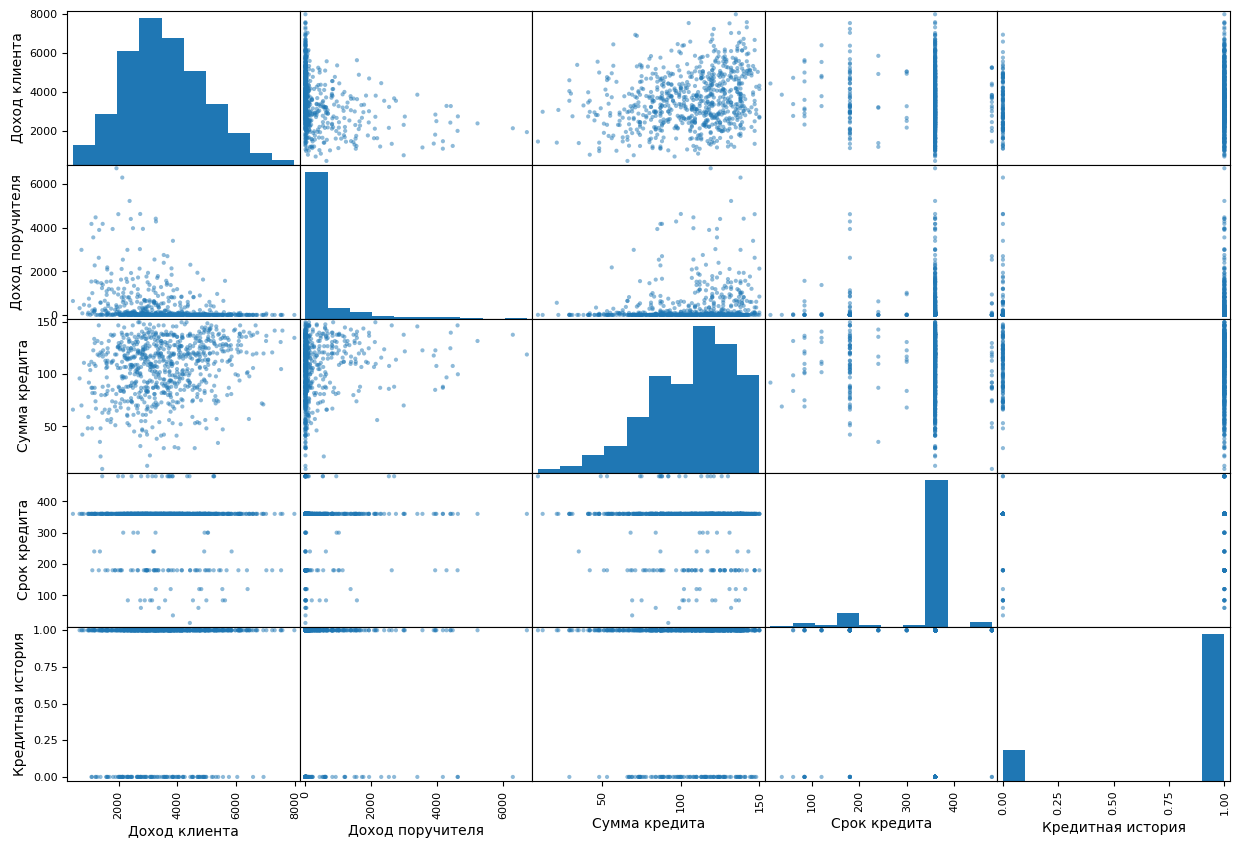

In [13]:
pd.plotting.scatter_matrix(df, figsize = (15, 10));

Вычислить коэффициенты корреляции для выбранных выше количественных признаков.

In [14]:
df['Доход клиента'].corr(df['Сумма кредита'], method = 'pearson')

0.23582582992075588

In [15]:
df['Доход клиента'].corr(df['Сумма кредита'], method = 'kendall')

0.15759298121532567

In [16]:
df['Доход клиента'].corr(df['Сумма кредита'], method = 'spearman')

0.2321608769024906

Вычислить коэффициенты корреляции для выбранных выше количественных признаков, разделенных на группы по выбранному выше категориальному признаку.

In [17]:
df.groupby('Одобрение кредита')[['Доход клиента', 'Сумма кредита']].corr(method = 'pearson')

Доход клиента  Сумма кредита
Одобрение кредита                                            
N                 Доход клиента       1.000000       0.266241
                  Сумма кредита       0.266241       1.000000
Y                 Доход клиента       1.000000       0.221047
                  Сумма кредита       0.221047       1.000000

In [18]:
df.groupby('Одобрение кредита')[['Доход клиента', 'Сумма кредита']].corr(method = 'spearman')

Доход клиента  Сумма кредита
Одобрение кредита                                            
N                 Доход клиента       1.000000       0.276659
                  Сумма кредита       0.276659       1.000000
Y                 Доход клиента       1.000000       0.210763
                  Сумма кредита       0.210763       1.000000

In [19]:
df.groupby('Одобрение кредита')[['Доход клиента', 'Сумма кредита']].corr(method = 'kendall')

Доход клиента  Сумма кредита
Одобрение кредита                                            
N                 Доход клиента       1.000000       0.188969
                  Сумма кредита       0.188969       1.000000
Y                 Доход клиента       1.000000       0.142684
                  Сумма кредита       0.142684       1.000000

Построить корреляционную матрицу для всех количественных признаков.

In [38]:
df.corr(method = 'pearson', numeric_only = True)

,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история
Доход клиента,1.000000,-0.291116,0.235826,-0.056178,0.076949
Доход поручителя,-0.291116,1.000000,0.141336,0.010900,-0.050197
Сумма кредита,0.235826,0.141336,1.000000,-0.037399,0.005810
Срок кредита,-0.056178,0.010900,-0.037399,1.000000,0.047775
Кредитная история,0.076949,-0.050197,0.005810,0.047775,1.000000


Построить гистограммы для любого из выбранных выше количественных признаков, разделенного по категориям выбранного выше категориального признака. Гистограммы должны иметь разные цвета. Отобразить легенду.

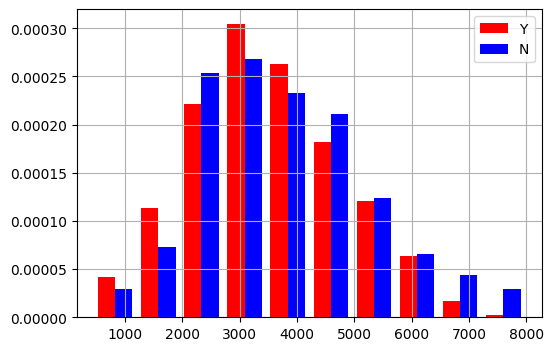

In [21]:
plt.figure(figsize = (6, 4))
df1 = df['Доход клиента'][df['Одобрение кредита'] == 'Y']
df2 = df['Доход клиента'][df['Одобрение кредита'] == 'N']
plt.hist([df1, df2],
         bins = 10,
         color = ['r', 'b'],
         density = True)
plt.legend(df['Одобрение кредита'].unique())
plt.grid();

Построить графики функции распределения для любого из выбранных выше количественных признаков, разделенного по категориям выбранного выше категориального признака. Графики должны иметь разные цвета. Отобразить легенду.

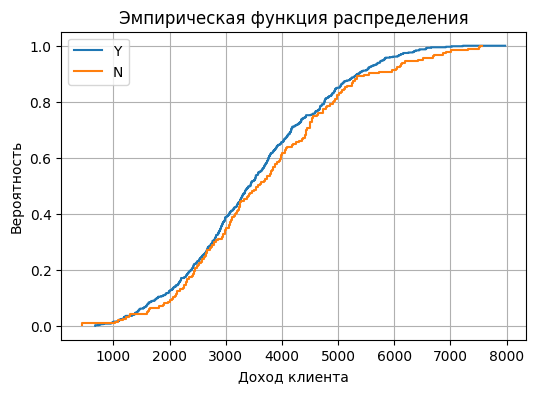

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_y = ECDF(df['Доход клиента'][df['Одобрение кредита'] == 'Y'])
ecdf_n = ECDF(df['Доход клиента'][df['Одобрение кредита'] == 'N'])
plt.figure(figsize = (6, 4))
plt.step(ecdf_y.x, ecdf_y.y)
plt.step(ecdf_n.x, ecdf_n.y)
plt.title('Эмпирическая функция распределения')
plt.ylabel('Вероятность')
plt.xlabel('Доход клиента')
plt.legend(df['Одобрение кредита'].unique())
plt.grid()


Построить диаграммы бокс-плот для любого из выбранных выше количественных признаков, разделенного по категориям выбранного выше категориального признака. Отобразить легенду.

<ipython-input-23-91fe22e2fdab>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Одобрение кредита'] == 'Y']['Доход клиента'],


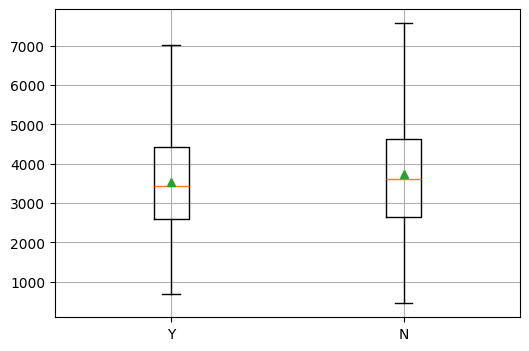

In [23]:
plt.figure(figsize = (6, 4))
plt.boxplot([df[df['Одобрение кредита'] == 'Y']['Доход клиента'],
             df[df['Одобрение кредита'] == 'N']['Доход клиента']],
            showfliers = False,
            labels = ['Y', 'N'],
            showmeans = True,
            whis = 1.5)

plt.grid()

Проверить статистическую гипотезу о равенстве числовых характеристик для любого из выбранных выше количественных признаков, разделенного по категориям выбранного выше категориального признака.

In [24]:
import numpy as np
df.groupby('Одобрение кредита')['Сумма кредита'].agg([np.mean, np.median]).T

<ipython-input-24-717aea64a41b>:2: FutureWarning: The provided callable <function mean at 0x79fdea8d6b60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Одобрение кредита')['Сумма кредита'].agg([np.mean, np.median]).T
<ipython-input-24-717aea64a41b>:2: FutureWarning: The provided callable <function median at 0x79fdea3831a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Одобрение кредита')['Сумма кредита'].agg([np.mean, np.median]).T


Одобрение кредита,N,Y
mean,109.409836,105.438078
median,115.000000,111.000000


In [25]:
from scipy.stats import levene
Доход_Д = df[df['Одобрение кредита'] == 'Y']['Доход клиента']
Доход_Н = df[df['Одобрение кредита'] == 'N']['Доход клиента']
levene(Доход_Д, Доход_Н)

LeveneResult(statistic=1.4763287101016793, pvalue=0.22474700594099495)

In [40]:
import scipy.stats as sts

Доход_Д = df[df['Одобрение кредита'] == 'Y']['Доход клиента']
Доход_Н = df[df['Одобрение кредита'] == 'N']['Доход клиента']

t_median_statistics, p_median_value  = sts.mannwhitneyu(Доход_Д,Доход_Н, alternative='two-sided')

t_mean_statistics, p_mean_value =  sts.ttest_ind(Доход_Д,Доход_Н, equal_var=False, alternative='two-sided')
print (f"median: {t_median_statistics, p_median_value} \nmean: {t_mean_statistics, p_mean_value}")

median: (46017.5, 0.15434829355713742) 
mean: (-1.7365917524473473, 0.08350870745554945)


Вычислить коэффициент корреляции между любым из выбранных выше количественных признаков выбранного выше категориального признака.


In [28]:
approval = df['Одобрение кредита'].replace(['Y', 'N'], [1, 0])
approval[:5]

<ipython-input-28-f7370bc1d0f2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  approval = df['Одобрение кредита'].replace(['Y', 'N'], [1, 0])


,Одобрение кредита
0,1
1,1
2,0
3,1
4,1


In [29]:
from scipy.stats import pointbiserialr

pointbiserialr(df['Сумма кредита'], approval)

SignificanceResult(statistic=-0.06311932210812218, pvalue=0.08967299574313015)

Построить столбчатые диаграммы, отражающие количество объектов по различным категориям любых двух категориальных признаков.

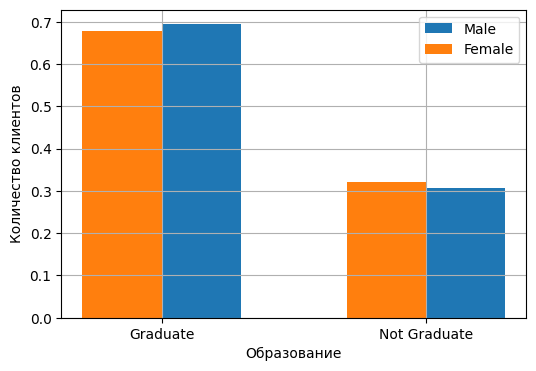

In [30]:
sm_Female = df['Образование'][df['Пол'] == 'Female'].value_counts(normalize = True)
sm_Male = df['Образование'][df['Пол'] == 'Male'].value_counts(normalize = True)

plt.figure(figsize = (6, 4))
x = np.arange(len(sm_Female.index))
w = 0.3
plt.bar(x + w/2, sm_Male.values, width = w)
plt.bar(x - w/2, sm_Female.values, width = w)
plt.xticks(x, sm_Male.index)
plt.legend(df['Пол'].unique())
plt.xlabel('Образование')
plt.ylabel('Количество клиентов')
plt.grid()

Для выбранных выше двух категориальных признаков вычислить коэффициенты ассоциации, контингенции, сопряженности.

In [31]:
cross = pd.crosstab(index = df['Образование'],
                    columns = df['Пол'],
                    margins = True)
cross.index = ['Graduated', 'Not graduated', 'margins']
cross.columns = ['Female', 'Male', 'margins']
cross

,Female,Male,margins
Graduated,112,383,495
Not graduated,53,169,222
margins,165,552,717


In [32]:
K_a = (cross.iloc[0, 0] * cross.iloc[1, 1] - cross.iloc[0, 1] * cross.iloc[1, 0]) /(cross.iloc[0, 0] * cross.iloc[1, 1] + cross.iloc[0, 1] * cross.iloc[1, 0])
K_a

-0.034950416804751826

In [33]:
h = cross.iloc[0, 0] * cross.iloc[1, 1] - cross.iloc[0, 1] * cross.iloc[1, 0]
z = np.sqrt(cross.iloc[2, 0] * cross.iloc[2, 1] * cross.iloc[0, 2] * cross.iloc[1, 2])
K_k = h / z
K_k

-0.013703984448892021

In [34]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(cross)[0]
chi2

0.13465201906901475

In [35]:
K_p = np.sqrt(chi2 / (chi2 + len(df)))
K_p

0.013636306990545473

In [36]:
n = len(df)
K_ch = np.sqrt(chi2 / n * np.sqrt((cross.shape[0] - 1) * (cross.shape[1] - 1)))
K_ch

0.019286443516251656